In [ ]:
import pandas as pd
df= pd.read_csv("/content/bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[["contact"]])

OneHotEncoder()

In [ ]:
res = encoder.transform(df[["contact"]]).toarray()
df[["cellular","telephone","unknown"]]  = res

In [ ]:
df.drop("contact", axis=1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,cellular,telephone,unknown
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no,0.0,0.0,1.0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no,0.0,0.0,1.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no,0.0,0.0,1.0
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no,0.0,0.0,1.0
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,yes,1.0,0.0,0.0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes,1.0,0.0,0.0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes,1.0,0.0,0.0
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,unknown,no,0.0,1.0,0.0


In [ ]:
ordinal_columns = df.select_dtypes("O").drop("y",axis=1).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
for col in ordinal_columns:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cellular,telephone,unknown
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no,0.0,0.0,1.0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no,0.0,0.0,1.0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no,0.0,0.0,1.0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no,0.0,0.0,1.0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no,0.0,0.0,1.0


<Axes: >

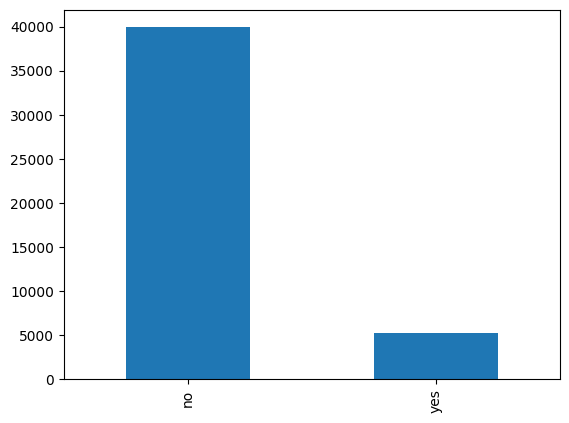

In [ ]:
df.y.value_counts().plot(kind="bar")

In [ ]:
x = df.drop("y", axis=1)
y= df.y

In [ ]:
col = ["age","balance","duration","month","job"]

In [ ]:
x[col]

,age,balance,duration,month,job
0,58,2143,261,8,4
1,44,29,151,8,9
2,33,2,76,8,2
3,47,1506,92,8,1
4,33,1,198,8,11
...,...,...,...,...,...
45206,51,825,977,9,9
45207,71,1729,456,9,5
45208,72,5715,1127,9,5
45209,57,668,508,9,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
model= MinMaxScaler(feature_range=(0,5))
model.fit(x[col])
x[col]= model.transform(x[col])

In [ ]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_new, y_new = sampler.fit_resample(x,y)


<Axes: >

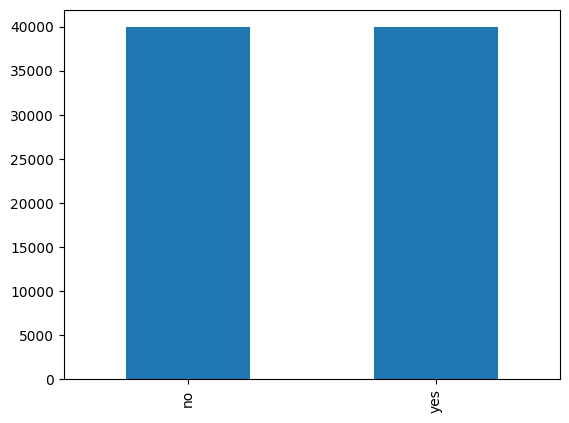

In [ ]:
y_new.value_counts().plot(kind="bar")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new)


## Modeling

## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model_lr.predict(X_test)
#acc = accuracy_score(y_test, y_pred)
#print("Accuracy Score : ", acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7869 2009]
 [2024 8059]]
              precision    recall  f1-score   support

          no       0.80      0.80      0.80      9878
         yes       0.80      0.80      0.80     10083

    accuracy                           0.80     19961
   macro avg       0.80      0.80      0.80     19961
weighted avg       0.80      0.80      0.80     19961



## 2) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= model_kn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7656 2222]
 [ 438 9645]]
              precision    recall  f1-score   support

          no       0.95      0.78      0.85      9878
         yes       0.81      0.96      0.88     10083

    accuracy                           0.87     19961
   macro avg       0.88      0.87      0.87     19961
weighted avg       0.88      0.87      0.87     19961



## 3) SVM

In [ ]:
from sklearn.svm import SVC
model_sv = SVC()
model_sv.fit(X_train,y_train)


SVC()

In [ ]:
y_pred= model_sv.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7710 2168]
 [3098 6985]]
              precision    recall  f1-score   support

          no       0.71      0.78      0.75      9878
         yes       0.76      0.69      0.73     10083

    accuracy                           0.74     19961
   macro avg       0.74      0.74      0.74     19961
weighted avg       0.74      0.74      0.74     19961



## 4) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred= model_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[8771 1107]
 [ 873 9210]]
              precision    recall  f1-score   support

          no       0.91      0.89      0.90      9878
         yes       0.89      0.91      0.90     10083

    accuracy                           0.90     19961
   macro avg       0.90      0.90      0.90     19961
weighted avg       0.90      0.90      0.90     19961



## 5) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred= model_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8995  883]
 [ 481 9602]]
              precision    recall  f1-score   support

          no       0.95      0.91      0.93      9878
         yes       0.92      0.95      0.93     10083

    accuracy                           0.93     19961
   macro avg       0.93      0.93      0.93     19961
weighted avg       0.93      0.93      0.93     19961



## 6) Hist Gradient Boost

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_hg= HistGradientBoostingClassifier()
model_hg.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [ ]:
y_pred= model_hg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8946  932]
 [ 645 9438]]
              precision    recall  f1-score   support

          no       0.93      0.91      0.92      9878
         yes       0.91      0.94      0.92     10083

    accuracy                           0.92     19961
   macro avg       0.92      0.92      0.92     19961
weighted avg       0.92      0.92      0.92     19961



## 7) Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()


## 8) MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp= MLPClassifier()
model_mlp.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_pred= model_mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8641 1237]
 [1527 8556]]
              precision    recall  f1-score   support

          no       0.85      0.87      0.86      9878
         yes       0.87      0.85      0.86     10083

    accuracy                           0.86     19961
   macro avg       0.86      0.86      0.86     19961
weighted avg       0.86      0.86      0.86     19961



## 9) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb= GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred= model_gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8640 1238]
 [ 794 9289]]
              precision    recall  f1-score   support

          no       0.92      0.87      0.89      9878
         yes       0.88      0.92      0.90     10083

    accuracy                           0.90     19961
   macro avg       0.90      0.90      0.90     19961
weighted avg       0.90      0.90      0.90     19961



## 10) Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gn= GaussianNB()
model_gn.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred= model_gn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5406 4472]
 [ 990 9093]]
              precision    recall  f1-score   support

          no       0.85      0.55      0.66      9878
         yes       0.67      0.90      0.77     10083

    accuracy                           0.73     19961
   macro avg       0.76      0.72      0.72     19961
weighted avg       0.76      0.73      0.72     19961



## 11) Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_et= ExtraTreesClassifier()
model_et.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred= model_et.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9100  778]
 [ 530 9553]]
              precision    recall  f1-score   support

          no       0.94      0.92      0.93      9878
         yes       0.92      0.95      0.94     10083

    accuracy                           0.93     19961
   macro avg       0.93      0.93      0.93     19961
weighted avg       0.93      0.93      0.93     19961

